<a href="https://colab.research.google.com/github/Ulysse3311/ESILV-Deep-Learning/blob/main/Ulysse_BERTHET_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# data from https://www.cs.toronto.edu/~kriz/cifar.html

In [112]:
#1
try :
  %tensorflow_version 2.x
except Exeption :
  pass

In [113]:
#2,3
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [114]:
#4
data=keras.datasets.cifar10
cifar10_data=data.load_data()

In [115]:
print(len(cifar10_data))
print(type(cifar10_data))

2
<class 'tuple'>


In [116]:
#6 unpacking data 
(train_imgs,train_labels),(test_imgs,test_labels)=cifar10_data

In [117]:
#7
class_names = [ "airplane " , "automobile " , "bird " , "cat " , "deer ", "dog " , "frog ","horse " , "ship " , "truck "]
print(train_imgs[0].shape)
print(train_imgs[0])

(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


exemples from the training data :

In [118]:
#8
print("images : ")
print(len(train_imgs))
print(train_imgs.shape)
print("labels : ")
print(len(train_labels))
print(train_labels.shape)

images : 
50000
(50000, 32, 32, 3)
labels : 
50000
(50000, 1)


500000 images <br>
32 pixels high <br>
32 pixels wide <br>
each pixel defined in RGB 3x[0:255]<br>

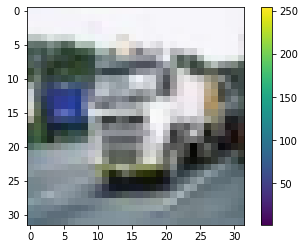

'truck '

In [119]:
#9
index = 1000
plt.figure()
plt.imshow(train_imgs[ index ])
plt.colorbar()
plt.grid( False )
plt.show()
class_names[train_labels[index][0]]

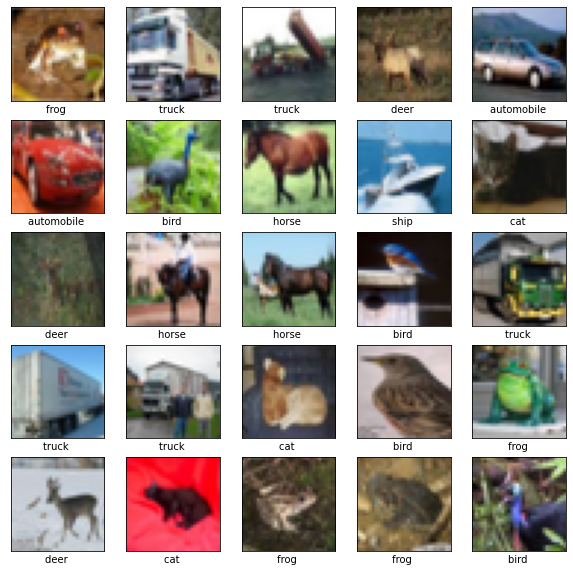

In [120]:
#10
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_imgs[i])
    plt.xticks ([])
    plt.yticks ([])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [121]:
#11 scaling:
train_imgs=train_imgs/255.0

In [122]:
#12, first neural network 3 layers, 2 activation funcitons
# layer 1 : flaten, from 32x32 matrix to 1024 list
# layer 2 : 128 relu nodes
# layer 3 : 10 softmax nodes (output)
model=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])

In [123]:
#13 training parameters:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
#14
model.fit(train_imgs,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0871 - accuracy: 0.2275
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8441 - accuracy: 0.3348
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7866 - accuracy: 0.3571
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7679 - accuracy: 0.3655
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7443 - accuracy: 0.3742
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.3759
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7185 - accuracy: 0.3857
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7125 - accuracy: 0.3830
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7009 - accuracy: 0.3896
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.701

In [125]:
#15 test on the test set :
test_loss,test_acc=model.evaluate(test_imgs,test_labels,verbose=2)

313/313 - 0s - loss: 266.5673 - accuracy: 0.3047


In [126]:
#16 make predictions:
predictions=model.predict(test_imgs)
print(predictions[0],"class : ",np.argmax(predictions[0]))
print(predictions[1],"class : ",np.argmax(predictions[1]))
print(predictions[2],"class : ",np.argmax(predictions[2]))


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] class :  8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] class :  8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] class :  8


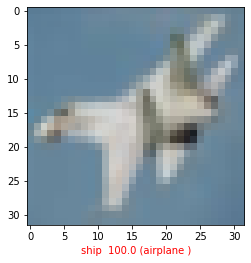

In [127]:
#17
def check_predict(index):
  success = 'red'
  a = np.argmax(predictions[index])
  if  a == test_labels[index][0]:
    success = 'blue'
  plt.imshow(test_imgs[index])
  xlab=f"{class_names[a]} {100*predictions[index][a].round(0)} ({class_names[test_labels[index][0]]})"
  plt.xlabel(xlab, c = success)


check_predict(10)

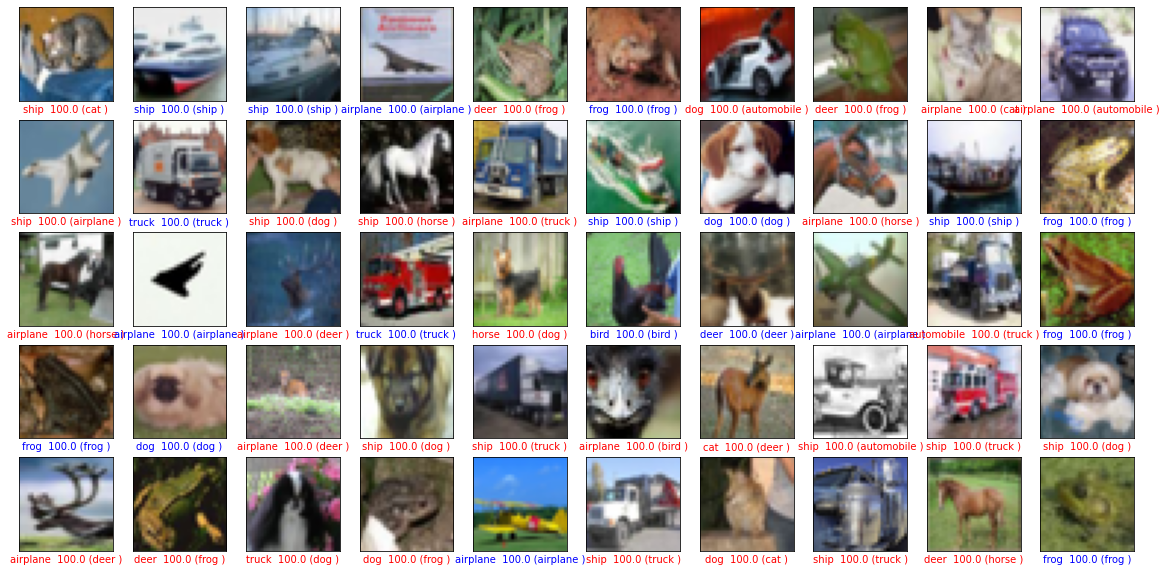

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8581922e-24,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [133]:
# 18
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    check_predict(i)
    plt.xticks ([])
    plt.yticks ([])
plt.show()

model.predict(np.expand_dims(test_imgs[5],axis=0))


In [129]:
# 19 improving the model 
# more layers
model2=keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(526,activation='relu'),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_imgs,train_labels,epochs=20)
test_loss,test_acc=model2.evaluate(test_imgs,test_labels,verbose=2)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0233 - accuracy: 0.2743
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7186 - accuracy: 0.3833
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6188 - accuracy: 0.4223
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5552 - accuracy: 0.4485
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5220 - accuracy: 0.4588
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4898 - accuracy: 0.4647
Epoch 7/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4676 - accuracy: 0.4747
Epoch 8/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4471 - accuracy: 0.4823
Epoch 9/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4192 - accuracy: 0.4886
Epoch 10/20
1563/1563 [==============================] - 13s 8ms/step - l

10 % improvement from the last model

In [130]:
# loss is not stabilized so we add more epochs
model2.fit(train_imgs,train_labels,epochs=50)
test_loss,test_acc=model2.evaluate(test_imgs,test_labels,verbose=2)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2939 - accuracy: 0.5351
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.2890 - accuracy: 0.5380
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2831 - accuracy: 0.5410
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2741 - accuracy: 0.5441
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2658 - accuracy: 0.5468
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2612 - accuracy: 0.5477
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2542 - accuracy: 0.5503
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2462 - accuracy: 0.5519
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2431 - accuracy: 0.5561
Epoch 10/50
1563/1563 [==============================] - 12s 8ms/step - l

accuracy is lower, overfitting ? 